# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | praia
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | aras
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | cravo norte
Processing Record 11 of Set 1 | socastee
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | fethiye
Processing Record 14 of Set 1 | skiros
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | bre

Processing Record 34 of Set 4 | tautira
Processing Record 35 of Set 4 | cockburn town
Processing Record 36 of Set 4 | bere
Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | lolua
City not found. Skipping...
Processing Record 39 of Set 4 | celestun
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | manokwari
Processing Record 42 of Set 4 | hihifo
City not found. Skipping...
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | lata
Processing Record 45 of Set 4 | borshchiv
Processing Record 46 of Set 4 | la palma
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | filadelfia
Processing Record 49 of Set 4 | barra patuca
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | mani
Processing Record 2 of Set 5 | muzquiz
City not found. Skipping...
Processing Record 3 of Set 5 | ayia marina
Processing Record 4 of Set 5 | moga
Processing Record 5 of Set 5 | turukhansk


Processing Record 25 of Set 8 | boo
Processing Record 26 of Set 8 | namibe
Processing Record 27 of Set 8 | vanavara
Processing Record 28 of Set 8 | honningsvag
Processing Record 29 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | aracaju
Processing Record 32 of Set 8 | khonsar
City not found. Skipping...
Processing Record 33 of Set 8 | bosaso
Processing Record 34 of Set 8 | mao
Processing Record 35 of Set 8 | amloh
Processing Record 36 of Set 8 | cherskiy
Processing Record 37 of Set 8 | kerema
Processing Record 38 of Set 8 | nabire
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | gornji milanovac
Processing Record 41 of Set 8 | canoinhas
Processing Record 42 of Set 8 | awjilah
Processing Record 43 of Set 8 | hailar
Processing Record 44 of Set 8 | azul
Processing Record 45 of Set 8 | puquio
Processing Record 46 of Set 8 | igarka
Processing Record 47 of Set 8 | imeni karla libknekhta
Processing

Processing Record 11 of Set 12 | oblivskaya
Processing Record 12 of Set 12 | dosso
Processing Record 13 of Set 12 | haibowan
City not found. Skipping...
Processing Record 14 of Set 12 | kostomuksha
Processing Record 15 of Set 12 | kodinsk
Processing Record 16 of Set 12 | baruun-urt
Processing Record 17 of Set 12 | ossora
Processing Record 18 of Set 12 | gisborne
Processing Record 19 of Set 12 | talnakh
Processing Record 20 of Set 12 | pelotas
Processing Record 21 of Set 12 | jadu
Processing Record 22 of Set 12 | alice springs
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | sabaudia
Processing Record 25 of Set 12 | egvekinot
Processing Record 26 of Set 12 | nandigama
Processing Record 27 of Set 12 | nuevo progreso
Processing Record 28 of Set 12 | huamuxtitlan
Processing Record 29 of Set 12 | sistranda
Processing Record 30 of Set 12 | chipinge
Processing Record 31 of Set 12 | guymon
Processing Record 32 of Set 12 | karla
Processing Record 33 of Set 12 | okhotsk
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,24.92,78,75,5.14,BR,1681336933
1,praia,14.9215,-23.5087,22.30,73,0,5.14,CV,1681336981
2,butaritari,3.0707,172.7902,27.42,74,61,2.62,KI,1681337069
3,bambous virieux,-20.3428,57.7575,24.14,94,20,1.54,MU,1681337070
4,aras,42.5617,-2.3560,5.40,87,100,3.09,ES,1681337070


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output_Data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,24.92,78,75,5.14,BR,1681336933
1,praia,14.9215,-23.5087,22.30,73,0,5.14,CV,1681336981
2,butaritari,3.0707,172.7902,27.42,74,61,2.62,KI,1681337069
3,bambous virieux,-20.3428,57.7575,24.14,94,20,1.54,MU,1681337070
4,aras,42.5617,-2.3560,5.40,87,100,3.09,ES,1681337070


In [8]:
# Relevant Data for Scatter Plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

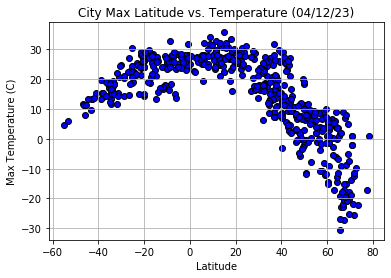

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, color="blue", linewidth=1, marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

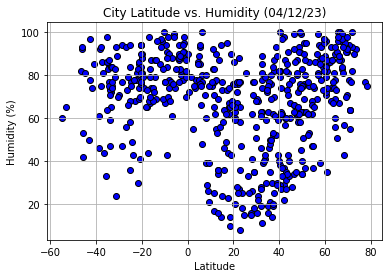

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, color="blue", edgecolor="black", marker="o", linewidth=1)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

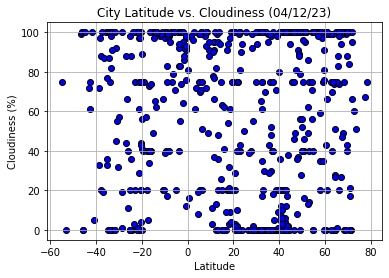

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, color="blue", edgecolor="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

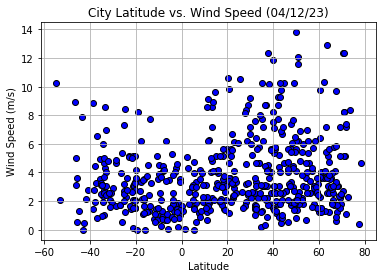

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speeds, color="blue", edgecolor="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,praia,14.9215,-23.5087,22.30,73,0,5.14,CV,1681336981
2,butaritari,3.0707,172.7902,27.42,74,61,2.62,KI,1681337069
4,aras,42.5617,-2.3560,5.40,87,100,3.09,ES,1681337070
5,kapaa,22.0752,-159.3190,26.99,76,75,6.69,US,1681337070
7,cravo norte,6.3017,-70.2041,32.20,48,100,1.85,CO,1681337070


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,24.92,78,75,5.14,BR,1681336933
3,bambous virieux,-20.3428,57.7575,24.14,94,20,1.54,MU,1681337070
6,kruisfontein,-34.0033,24.7314,15.75,47,100,2.76,ZA,1681337070
9,punta arenas,-53.1500,-70.9167,6.06,65,0,2.06,CL,1681336940
11,hobart,-42.8794,147.3294,13.48,97,75,0.00,AU,1681337071


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7260100219165191


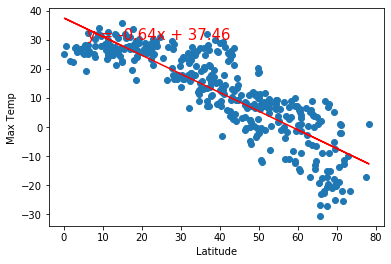

In [80]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.5304621639150713


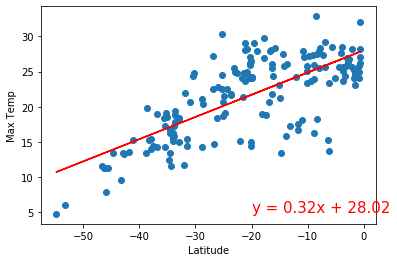

In [82]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-20,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [24]:
# My Reponse
# There is a large positive correlation between temperatue and latitude in the northern hemisphere. 
# There is also a large positive correlation between temperature and latitude in the southern hemisphere.
# This would make sense becuase the equator splits the northern and southern hemispheres of the earth.
# It is also warmer near the equator which is shown in both graphs, at 0 latitude the temperatures are at their highest.
# Then as the latitude moves away from 0, the temperatures come down becuase we are moving away from the equator. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09336440680687033


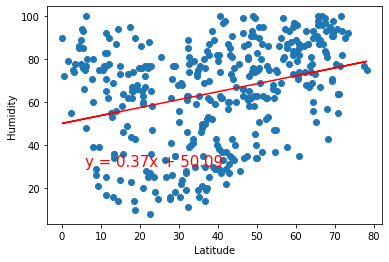

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))

The r-value is: 0.0784236825899952


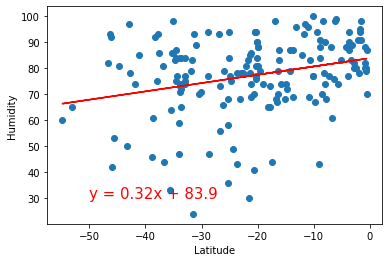

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [56]:
#My Response
# There is a small positive correclation between latitude and humidity in the northern hemisphere. 
# There is also a small positive correclation between latitude and humidity in the southern hemisphere. 
# When looking at the northern hemisphere there really isn't a correclation, the data is all over the chart with no 
# real true correction. There really isn't one for the southern hemisphere either but you can kind of infer from the 
# data points on the graph that the closer to the equator the more humid it is. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011366604515367683


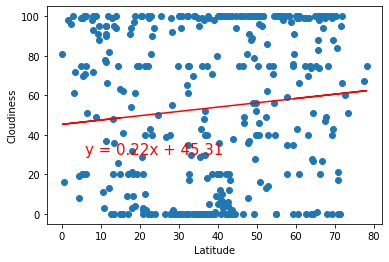

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(6,30))

The r-value is: 0.04065458095069605


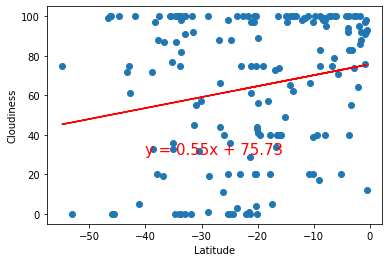

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-40,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [30]:
# My Response
# There is a small positive correclation between latitude and cloudiness in the northern hemisphere. 
# There is also a small positive correclation between latitude and cloudiness in the southern hemisphere. 
# When looking at both hemispheres there really is not a true correclation between latitude and cloudiness. This means
# that one is not related to the other and they do not affect each other. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008212422538073754


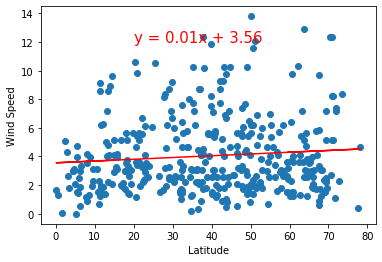

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(20,12))

The r-value is: 0.07898776574932638


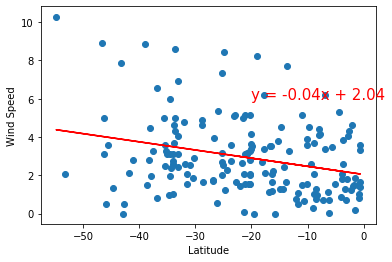

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-20,6))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [46]:
# My Reponse
# There is a pretty small positive correlation between latitude and wind speed in the northern hemisphere.
# There is a small positive correlation between latitude and wind speed in the southern hemisphere. 
# There really is no correlation between latitude and wind speed in the northern hemisphere because the r-value is 
# so so small. There is a slight correlation you can make between latitude and wind speed in the southern hemisphere.
# It is small but you can see in the graph that most of the data points are located in one general area and trend in 
# the same direction. It would look like from the graph that wind speeds are lower closer to the equator but again 
# this correclation is small.